In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# matplotlib 한글 깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
df = pd.read_csv('credit_card_data(utf8).txt')

In [6]:
df['card_use_rate'] = df['num_usecard'] / df['num_opencard'] * 100

In [7]:
data_by_sex = df[df.pop_cd.str[0]=='Y'] # 지역x, 성별o
data_by_loc = df[df.pop_cd.str[0]=='L'] # 지역o, 성별x

In [15]:
# data_by_sex_90s = data_by_sex[data_by_sex.ages=='90대'] # 90대, 성별o
# data_by_loc_90s = data_by_loc[data_by_loc.ages=='90대'] # 90대, 지역o

In [8]:
data_by_seoul = data_by_loc[data_by_loc.city=='서울']
data_by_incheon = data_by_loc[data_by_loc.city=='인천']
data_by_gyeonggi = data_by_loc[data_by_loc.city=='경기']
data_by_capital = pd.concat([data_by_seoul,data_by_incheon,data_by_gyeonggi])

In [9]:
data_by_seoul_10s = data_by_seoul[data_by_seoul.ages=='10대']
data_by_seoul_20s = data_by_seoul[data_by_seoul.ages=='20대']
data_by_seoul_30s = data_by_seoul[data_by_seoul.ages=='30대']
data_by_seoul_40s = data_by_seoul[data_by_seoul.ages=='40대']
data_by_seoul_50s = data_by_seoul[data_by_seoul.ages=='50대']
data_by_seoul_60s = data_by_seoul[data_by_seoul.ages=='60대']
data_by_seoul_70s = data_by_seoul[data_by_seoul.ages=='70대']
data_by_seoul_80s = data_by_seoul[data_by_seoul.ages=='80대']
data_by_seoul_90s = data_by_seoul[data_by_seoul.ages=='90대']

In [10]:
data_by_10s = data_by_loc[data_by_loc.ages=='10대']
data_by_20s = data_by_loc[data_by_loc.ages=='20대']
data_by_30s = data_by_loc[data_by_loc.ages=='30대']
data_by_40s = data_by_loc[data_by_loc.ages=='40대']
data_by_50s = data_by_loc[data_by_loc.ages=='50대']
data_by_60s = data_by_loc[data_by_loc.ages=='60대']
data_by_70s = data_by_loc[data_by_loc.ages=='70대']
data_by_80s = data_by_loc[data_by_loc.ages=='80대']
data_by_90s = data_by_loc[data_by_loc.ages=='90대']

In [18]:
data_by_seoul_10s.head(1)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,card_use_rate
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,1120000,8210000,78020000,92170000,87260000,0,0,78.472222


In [12]:
df.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment',
       'card_use_rate'],
      dtype='object')

In [13]:
# 경기동행지수 # coincident composite index
cci = pd.read_csv('경기동행지수.csv') 
cci

,경기동행지수
0,100.1
1,99.9
2,99.8
3,99.7
4,99.9
5,100.1
6,100.3
7,100.3
8,100.1
9,99.9


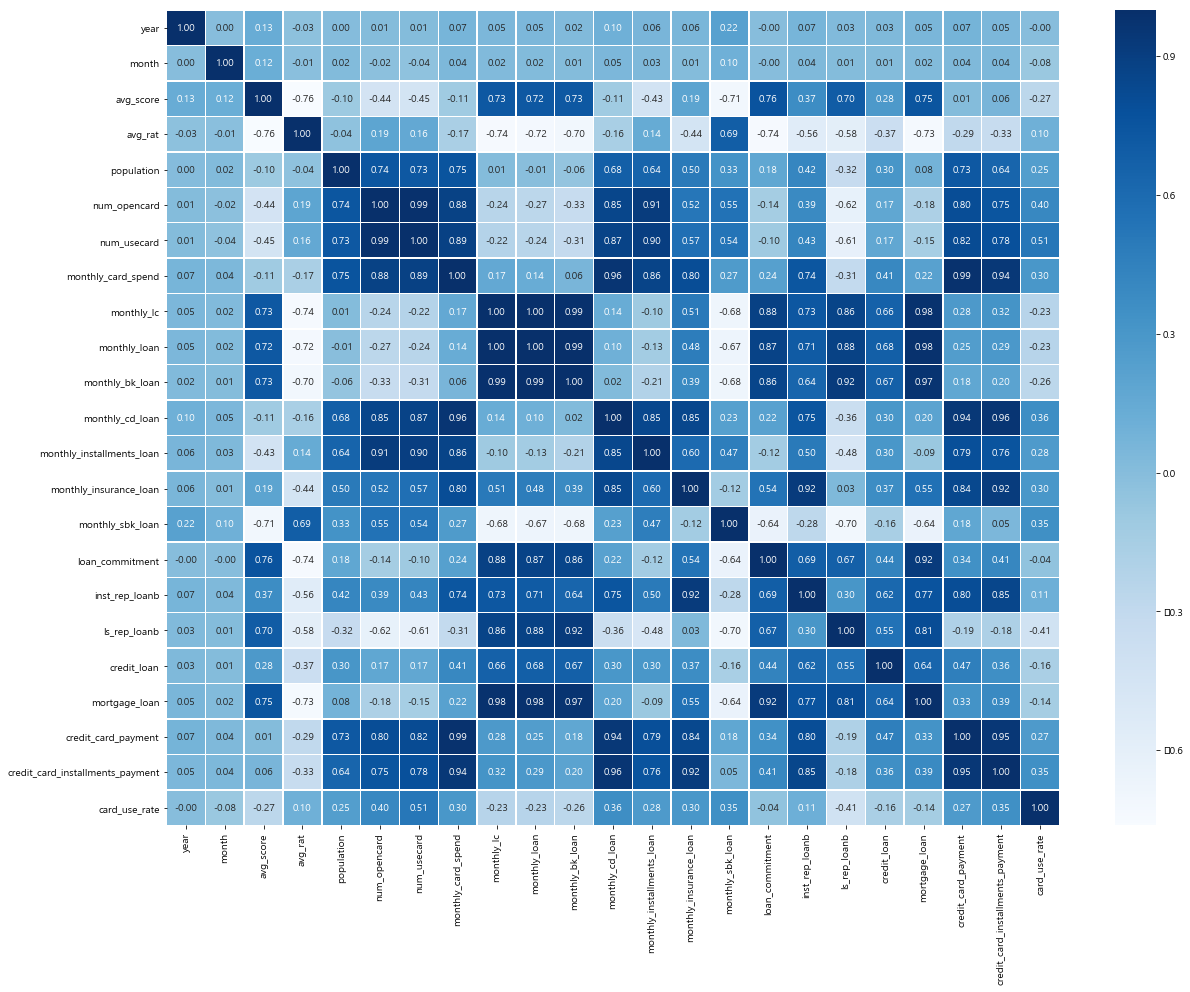

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data_by_capital.corr(), annot=True,
           fmt='.2f', linewidths=.5, cmap='Blues')

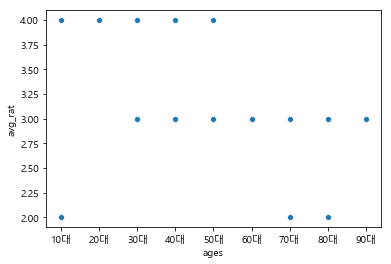

In [46]:
sns.scatterplot(x='ages', y='avg_rat', data=df)
# 10대의 신용등급은 2 또는 4
# 20대의 신용등급은 모두 4등급 / 60, 90대는 모두3등급
# 30,40,50대의 신용등급은 3등급,4등급
# 70,80대는 2등급 또는 3등급

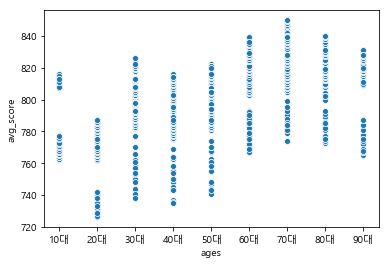

In [47]:
sns.scatterplot(x='ages', y='avg_score', data=df)

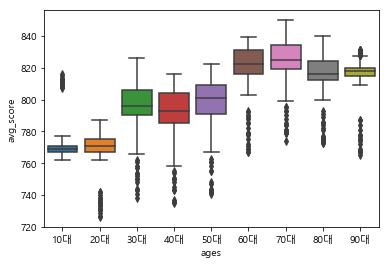

In [51]:
sns.boxplot(x='ages', y='avg_score', data=df)
# 60,70,80대의 신용등급
# 30,40,50대의 신용등급

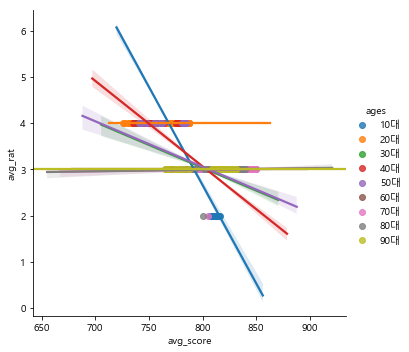

In [20]:
sns.lmplot(x='avg_score', y='avg_rat', hue='ages', data=df)
# 전국 90대 신용등급 평균이 3등급

In [52]:
# df = df[df['ages'] != '90대']
# df = df[df['ages'] != '80대']
# df = df[df['ages'] != '70대']
# df = df[df['ages'] != '60대']
# df = df[df['ages'] != '20대']
# df

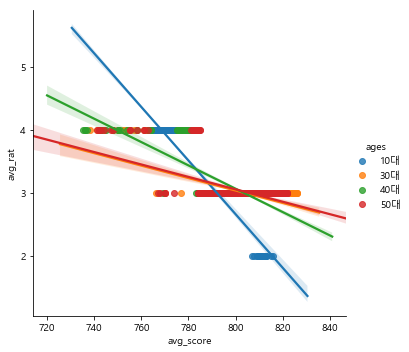

In [38]:
# sns.lmplot(x='avg_score', y='avg_rat', hue='ages', data=df)

In [ ]:
# 나이대 별 신용카드 갯수, 사용갯수, 월 카드 사용량으로 대출금액 예측?

def Linear_model(age_data):
    
    x=age_data.drop(['monthly_cd_loan','monthly_card_spend','pop_cd','city','ages','sex','credit_card_payment','credit_card_installments_payment'], axis=1)
    
    y=age_data['monthly_card_spend']
    
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.5)
    
    lm = LinearRegression()
    
    lm.fit(x_train,y_train)
    
    preditions= lm.predict(x_test)
    
    plt.scatter(y_test,preditions)

In [1]:
# 나이에 따른 신용점수,월별 추세
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# # df.pop_cd.str[0]=='L'
# x = data_by_month['']
# y = data_by_20s['avg_score']
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)
# lm = LinearRegression()
# lm.fit(x_train, y_train)
# predictions = lm.predict(x_test)
# plt.scatter(y_test, predictions)